# ShopLock Recommendation of Land


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

plt.rcParams['figure.figsize']=[12,8]

In [2]:
df=pd.read_csv('ShopLock_Recomendation.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,Hospitals,Public Connectivity,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 sq mt,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 sq km,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 sq mt,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 sq mt,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 sq mt,NaN,1200.0,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,Hospitals,Public Connectivity,price
13312,Built-up Area,Ready To Move,Whitefield,5 sq km,ArsiaEx,3453.0,4.0,0.0,231.0
13313,Super built-up Area,Ready To Move,Richards Town,4 sq mt,NaN,3600.0,5.0,NaN,400.0
13314,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 sq mt,Mahla T,1141.0,2.0,1.0,60.0
13315,Super built-up Area,18-Jun,Padmanabhanagar,4 sq mt,SollyCl,4689.0,4.0,1.0,488.0
13316,Super built-up Area,Ready To Move,Doddathoguru,1 sq mt,NaN,550.0,1.0,1.0,17.0


In [4]:
df.shape

(13317, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            13287 non-null  object 
 1   availability         13287 non-null  object 
 2   location             13286 non-null  object 
 3   size                 13271 non-null  object 
 4   society              7807 non-null   object 
 5   total_sqft           13287 non-null  float64
 6   Hospitals            13214 non-null  float64
 7   Public Connectivity  12679 non-null  float64
 8   price                13287 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.5+ KB


In [6]:
df.isnull().sum()

area_type                30
availability             30
location                 31
size                     46
society                5510
total_sqft               30
Hospitals               103
Public Connectivity     638
price                    30
dtype: int64

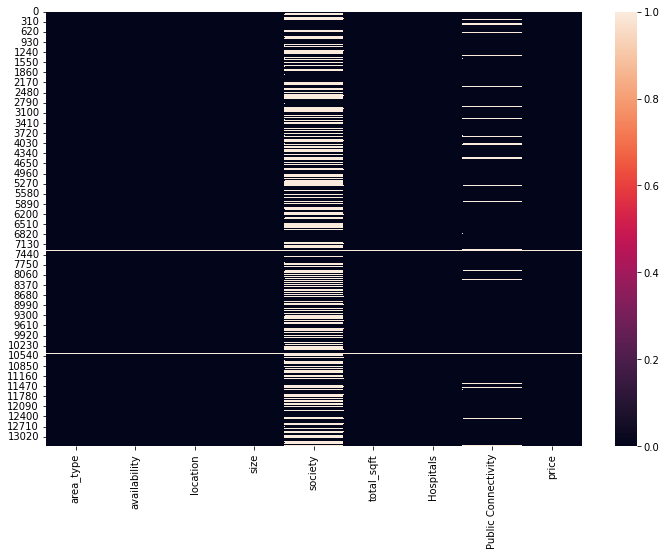

In [7]:
sns.heatmap(df.isnull())

In [8]:
(df.isnull().sum()/len(df))*100

area_type               0.225276
availability            0.225276
location                0.232785
size                    0.345423
society                41.375685
total_sqft              0.225276
Hospitals               0.773447
Public Connectivity     4.790869
price                   0.225276
dtype: float64

In [9]:
#40% of the data is missing so droping the column
df.drop('society',axis=1,inplace=True)

In [10]:
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)

In [11]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.Hospitals=df.Hospitals.astype(np.number)

In [12]:
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()

0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: object

In [13]:
df.isnull().sum() 

area_type                0
availability             0
location                 0
size                    46
total_sqft              30
Hospitals              103
Public Connectivity    638
price                   30
dtype: int64

In [14]:
df_cat=df.select_dtypes(object)
df_cat.head(1)

,area_type,availability,location
0,Super built-up Area,0,Electronic City Phase II


In [15]:
df_num=df.select_dtypes(np.number)
df_num.head(1)

,size,total_sqft,Hospitals,Public Connectivity,price
0,2.0,1056.0,2.0,1.0,39.07


In [16]:
imputer = KNNImputer()

# fit on the dataset
imputer.fit(df_num)

# transform the dataset
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)

In [17]:
df=pd.concat([df_cat,df_num_impute],axis=1)

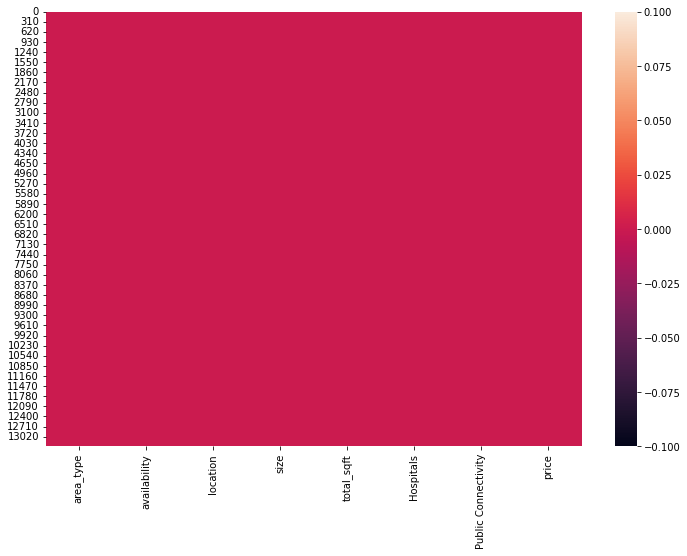

In [18]:
sns.heatmap(df.isnull())

In [19]:
(df.isnull().sum()/len(df))*100

area_type              0.0
availability           0.0
location               0.0
size                   0.0
total_sqft             0.0
Hospitals              0.0
Public Connectivity    0.0
price                  0.0
dtype: float64

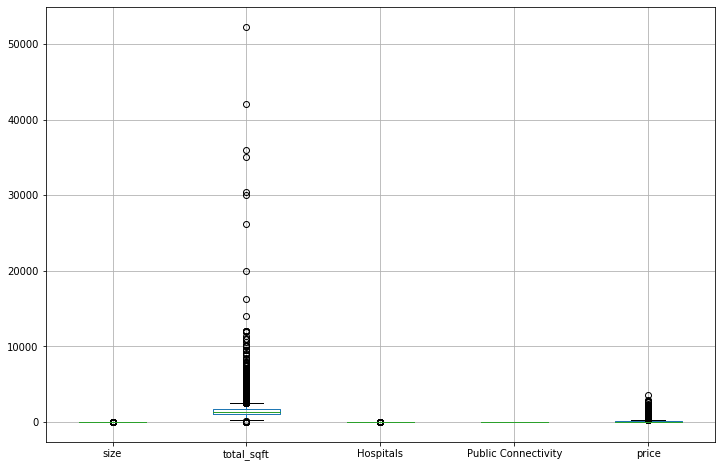

In [20]:
df.boxplot()

In [21]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,area_type,availability,location,size,total_sqft,Hospitals,Public Connectivity,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


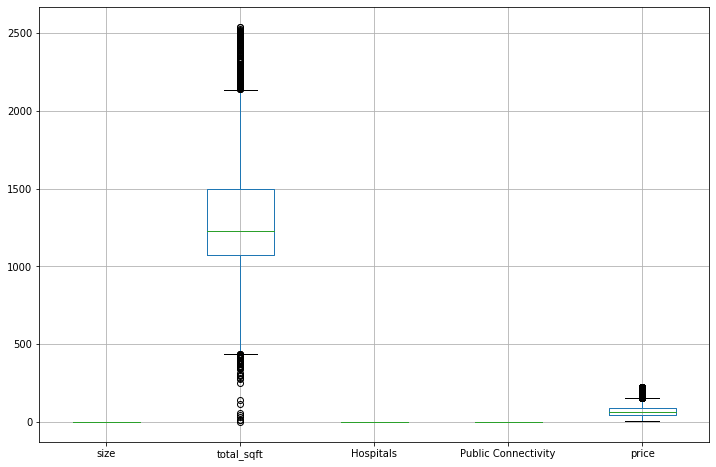

In [22]:
df.boxplot()

In [23]:
df.shape

(11120, 8)

<a id="eda"></a>
## 4.EDA

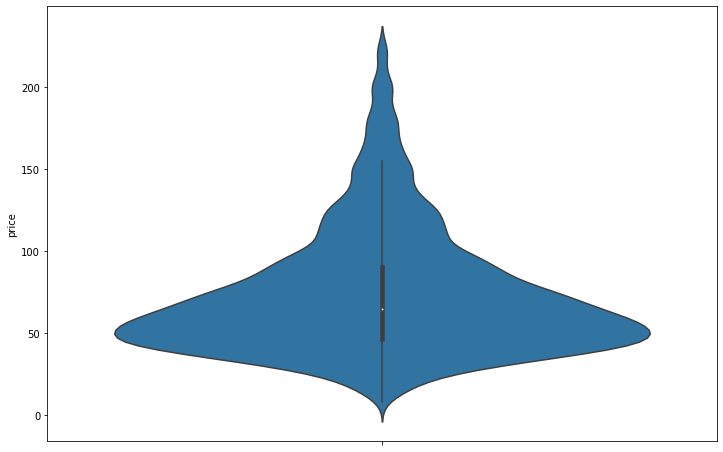

In [24]:
sns.violinplot(y = df.price)

Text(0, 0.5, 'Availability of Land')

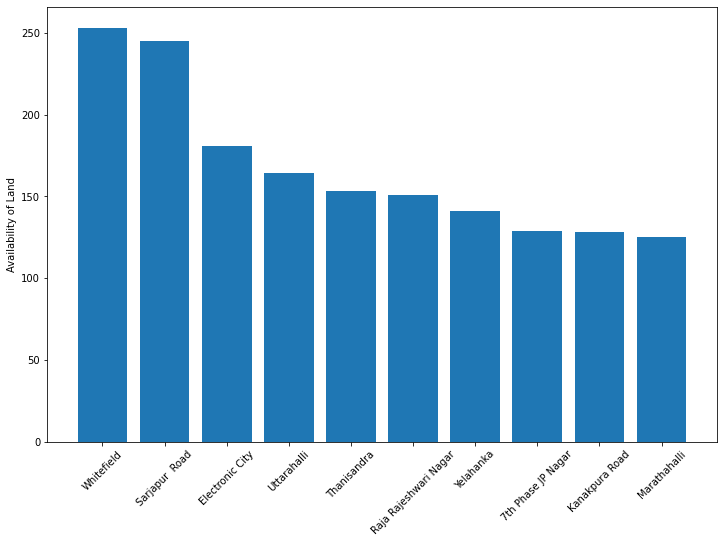

In [25]:
plt.bar(x=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Availability of Land')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


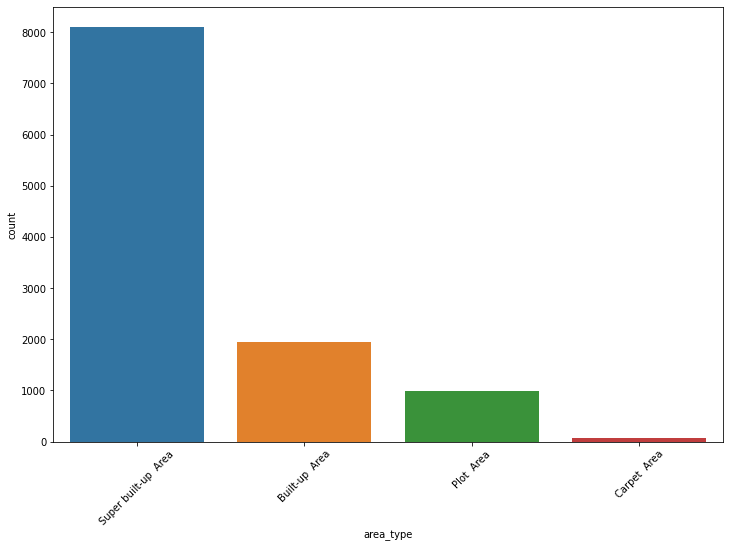

In [26]:
sns.countplot(df.area_type)
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


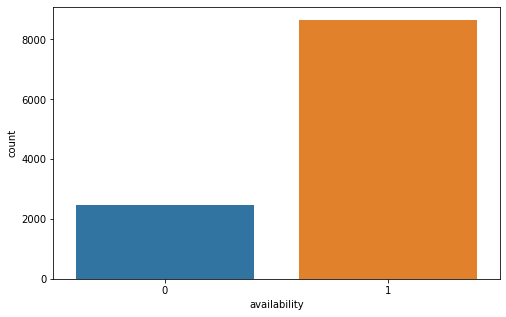

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df.availability)
plt.show()

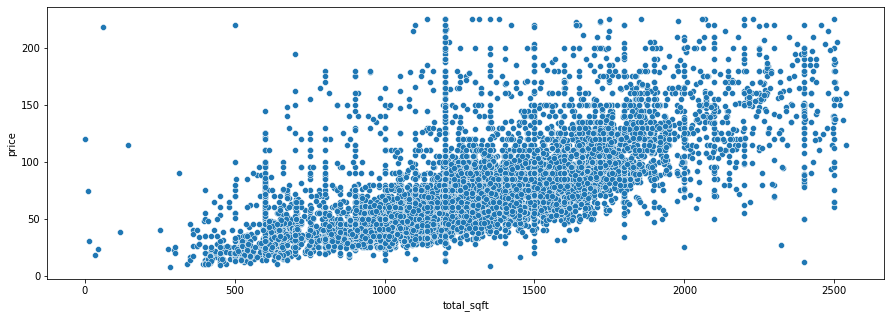

In [28]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="total_sqft", y="price", data=df)
plt.show()

Text(0.5, 0, 'Size of Land in sq km')

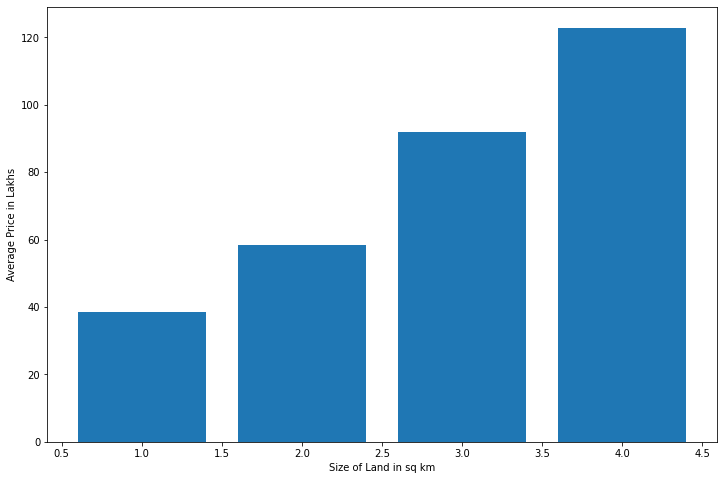

In [29]:
df10 = df.copy()
df10['size'] = np.round(df10['size'])
plt.bar(x=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Average Price in Lakhs')
plt.xlabel('Size of Land in sq km')

In [30]:
# Costliest locations in Bangalore

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

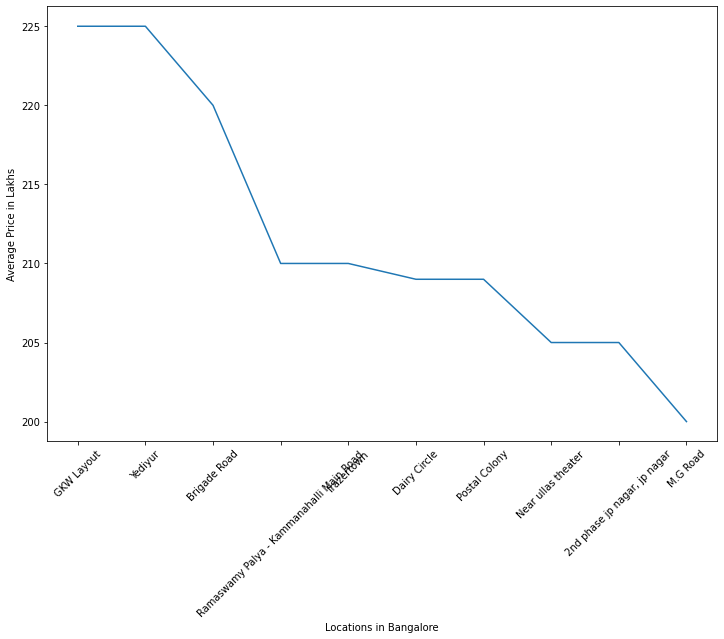

In [31]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations in Bangalore')
plt.ylabel('Average Price in Lakhs')
plt.xticks(rotation=45)

In [32]:
# Costliest Per sq.ft price in bglore

In [33]:
df['per_sqft'] = df['price']/df['total_sqft']

Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

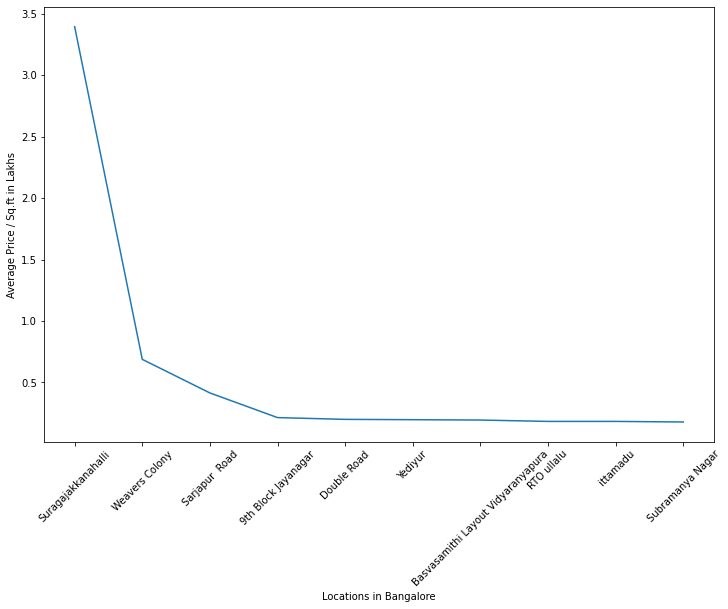

In [34]:
plt.plot(df.groupby(by='location')['per_sqft'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations in Bangalore')
plt.ylabel('Average Price / Sq.ft in Lakhs')

In [35]:
df = df.drop('per_sqft',axis=1)

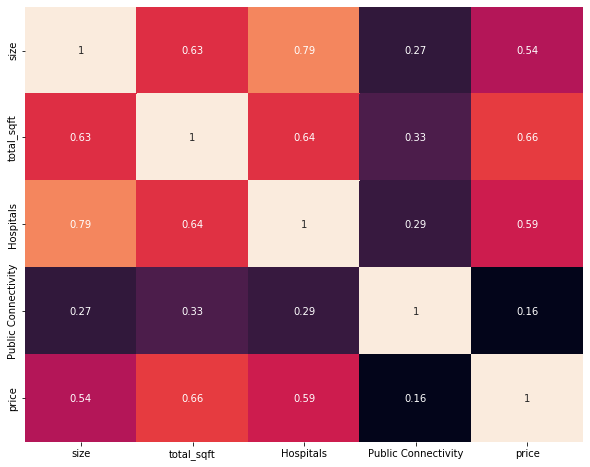

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

## Standardisation

In [37]:
df.head()

,area_type,availability,location,size,total_sqft,Hospitals,Public Connectivity,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


In [38]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [39]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,total_sqft,Hospitals,Public Connectivity,price
0,0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515
1,1,0.837003,0.386558,-0.440965,1.862747,-0.306717
2,2,0.837003,0.599901,1.063850,-0.715699,0.552174
3,3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013
4,4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364


In [40]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,size,total_sqft,Hospitals,Public Connectivity,price,area_type,availability,location
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,Super built-up Area,0,Electronic City Phase II
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,Built-up Area,1,Uttarahalli
2,0.837003,0.599901,1.063850,-0.715699,0.552174,Super built-up Area,1,Lingadheeranahalli
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,Super built-up Area,1,Kothanur
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,Super built-up Area,1,Whitefield


## Encoding

In [41]:
data_encoded_refernce=pd.get_dummies(df,columns=['area_type','location'])
data_encoded_refernce.head()

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,2.0,1170.0,2.0,1.0,38.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['area_type','location'])
data_encoded_scaled.head()

,size,total_sqft,Hospitals,Public Connectivity,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.837003,0.386558,-0.440965,1.862747,-0.306717,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.837003,0.599901,1.063850,-0.715699,0.552174,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<a id="hier"></a>
#Hierarchical Clustering

In [43]:
d1 = data_encoded_scaled.copy()

In [44]:
data_cluster=data_encoded_refernce.copy()

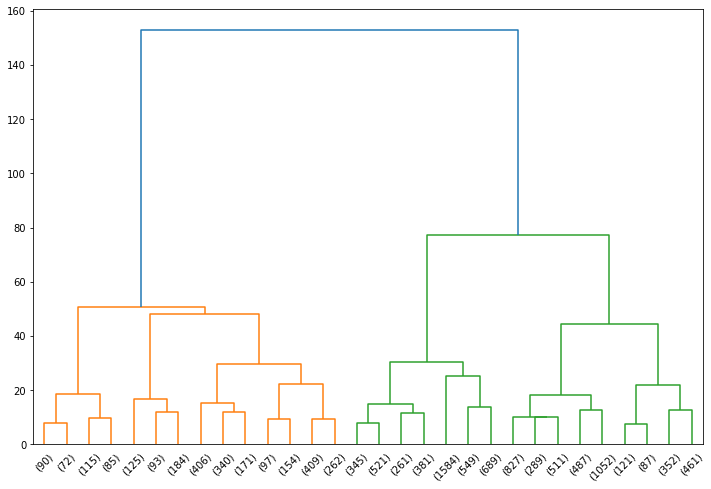

In [45]:
cls=d1[['total_sqft','price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [46]:
cluster=cut_tree(mergings,n_clusters=3)

In [47]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [48]:
cluster_cut.value_counts()

1    4330
0    4187
2    2603
dtype: int64

In [49]:
d1['cluster']=cluster

In [50]:
data_cluster['cluster']=cluster

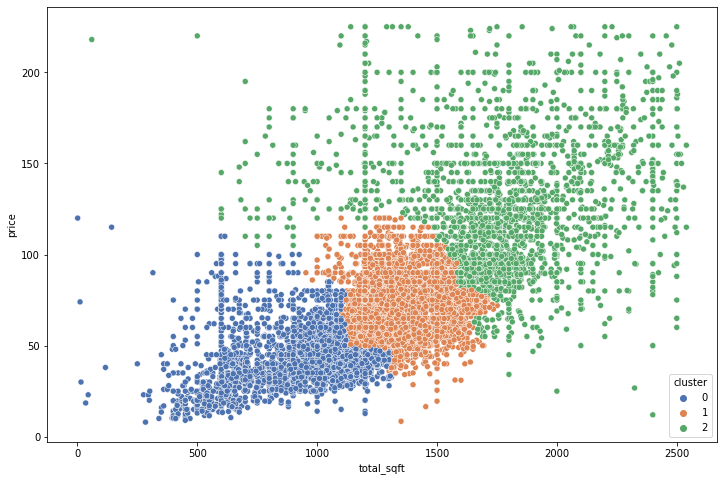

In [51]:
sns.scatterplot(y=df.price,x=df['total_sqft'],hue=data_cluster['cluster'],palette='deep')

<a id="kmeans"></a>
#KMEANS Clustering

In [52]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

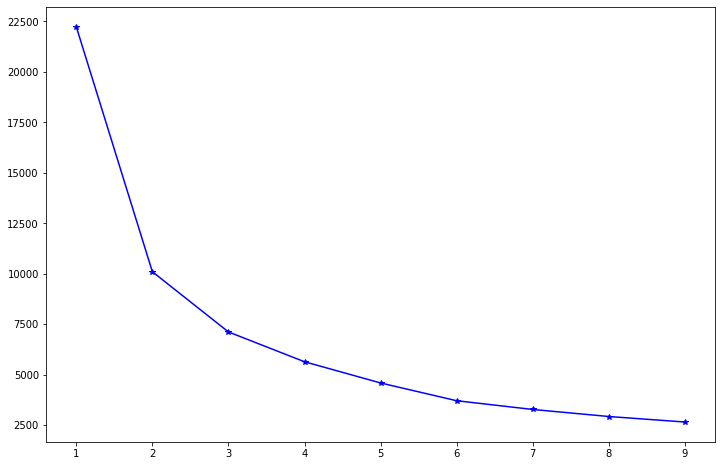

In [53]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [54]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

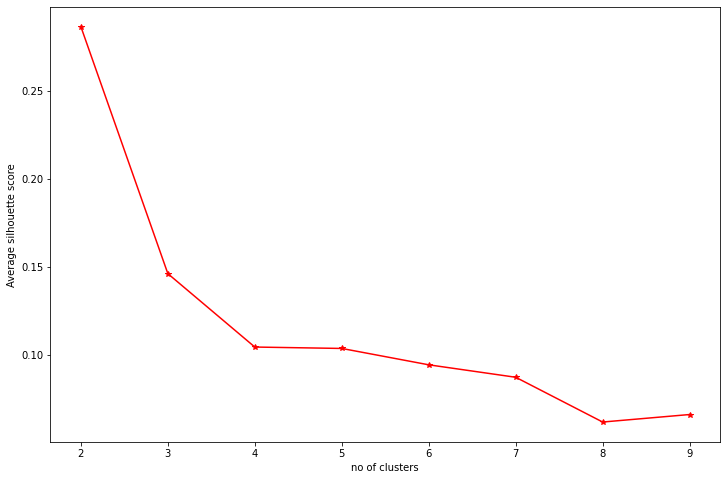

In [55]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [56]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()	

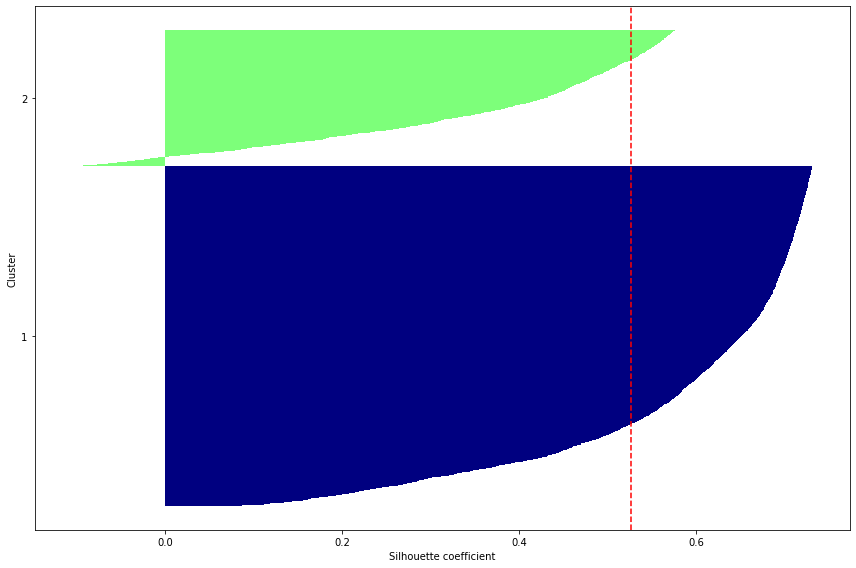

In [57]:
svisualizer(cls,2)

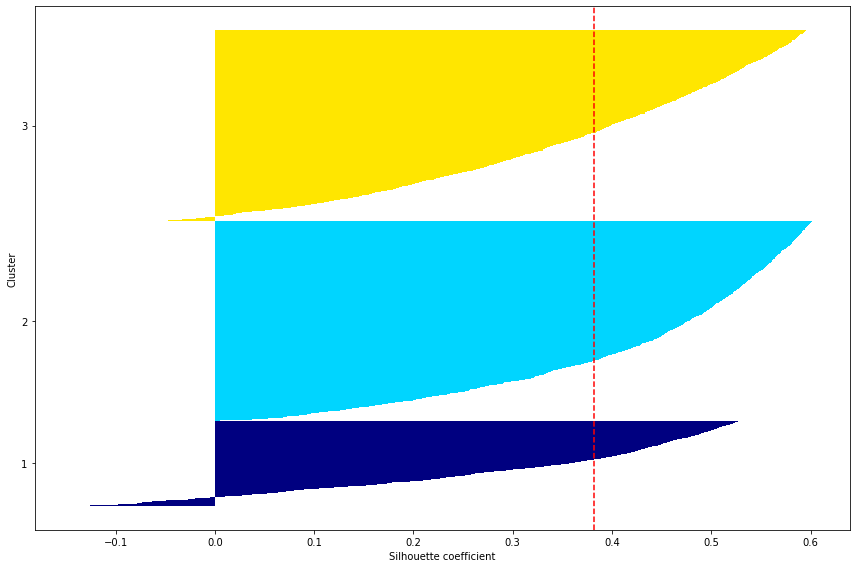

In [58]:
svisualizer(cls,3)

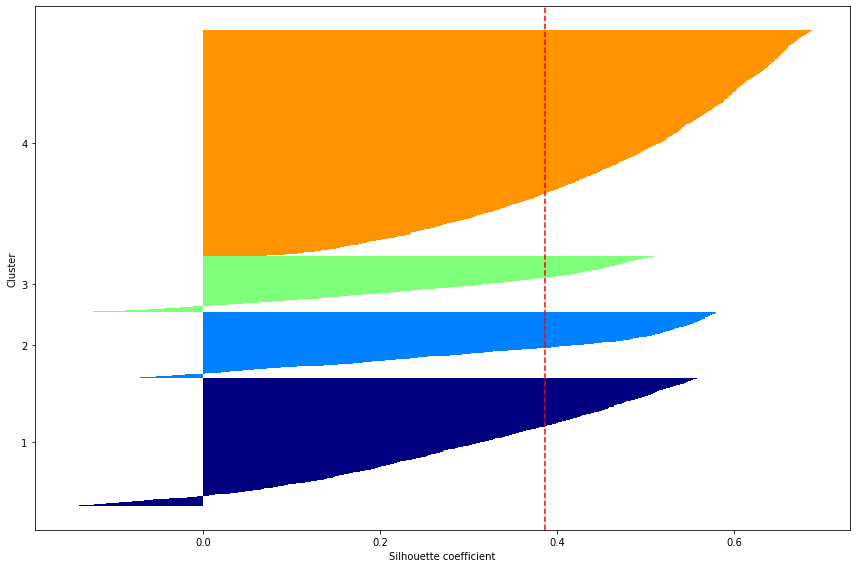

In [59]:
svisualizer(cls,4)

In [60]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head(20)

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled,cluster,kmeans_cluster
0,0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1,2.0,1170.0,2.0,1.0,38.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,3.0,1310.0,3.0,1.0,63.25,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,0,3.0,1800.0,2.0,2.0,70.00,0,0,0,1,...,0,0,0,0,0,0,0,0,2,1
12,1,2.0,1000.0,2.0,1.0,38.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,2.0,1100.0,2.0,2.0,40.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,3.0,2250.0,3.0,2.0,148.00,0,0,1,0,...,0,0,0,0,0,0,0,0,2,1


In [61]:
df3 = data_cluster.iloc[:,[0,1,2,3,4,5,1119]]

In [62]:
df4 = df3.groupby(by='kmeans_cluster')
df4[['size','Hospitals','Public Connectivity','total_sqft','price']].mean()

,size,Hospitals,Public Connectivity,total_sqft,price
kmeans_cluster,,,,,
0,2.341520,2.159438,1.534669,1225.221968,65.278472
1,3.049944,2.966886,1.916830,1809.807419,112.709475
2,1.849394,1.758223,1.070398,750.521968,45.934325


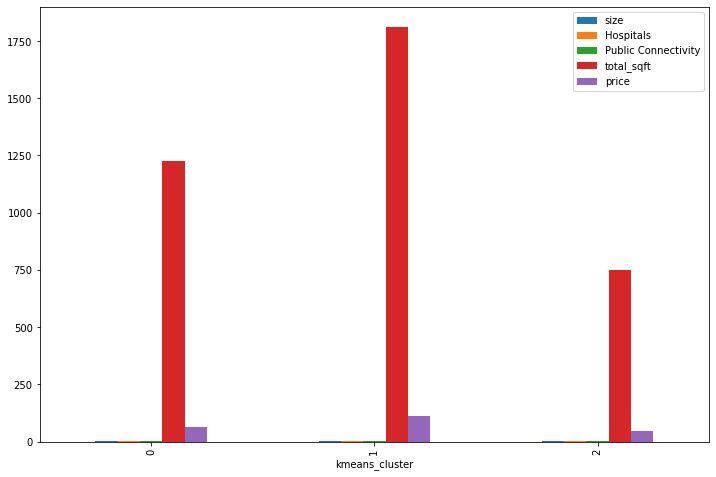

In [63]:
df4[['size','Hospitals','Public Connectivity','total_sqft','price']].mean().plot.bar()
plt.show()

In [64]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

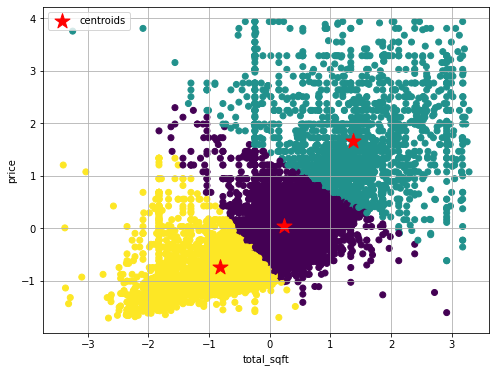

In [65]:
cluster_plot(cls,3)

<a id="DBScan"></a>
###DBSCAN

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

 0    11075
-1       29
 3        7
 1        6
 2        3
dtype: int64

In [68]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    11091
-1       29
dtype: int64

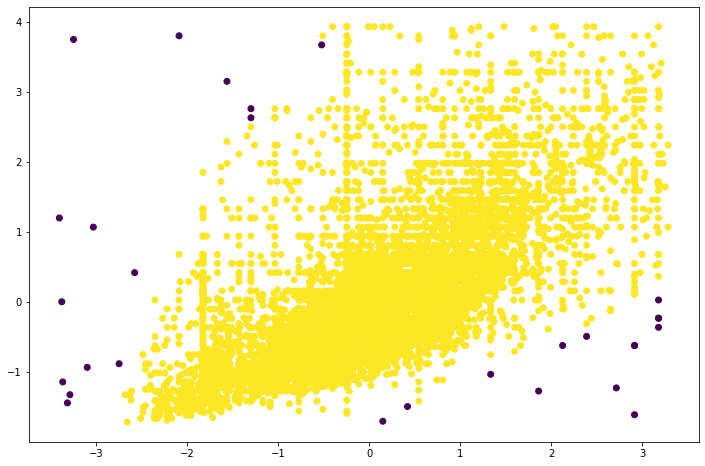

In [69]:
plt.scatter(cls['total_sqft'],cls['price'],c=lbl)

<a id="PCA"></a>
##Principal Component Analysis(PCA)

In [70]:
from sklearn.decomposition import PCA

In [71]:
d2 = data_num_scaled.drop(['index'],axis=1)

In [72]:
d2.head()

,size,total_sqft,Hospitals,Public Connectivity,price
0,-0.649410,-0.624846,-0.440965,-0.715699,-0.903515
1,0.837003,0.386558,-0.440965,1.862747,-0.306717
2,0.837003,0.599901,1.063850,-0.715699,0.552174
3,-0.649410,-0.245570,-0.440965,-0.715699,-0.593013
4,-0.649410,-0.324586,-0.440965,-0.715699,-0.931364


In [73]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(d2)

print(np.cumsum(pca.explained_variance_ratio_*100))

[ 61.26419718  78.95134173  89.64037079  95.897461   100.        ]


In [74]:
pca=PCA(n_components=2)
pca.fit_transform(d2)

print(pca.explained_variance_ratio_*100)


[61.26419718 17.68714455]


In [75]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
size,0.492645,0.092128
total_sqft,0.490447,0.025868
Hospitals,0.503375,0.094173
Public Connectivity,0.250660,-0.946288
price,0.447823,0.294133


In [76]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-1.432366,0.293985
1,0.709523,-1.807326
2,1.309959,1.032485
3,-1.107301,0.395125
4,-1.297575,0.293561
...,...,...
11115,-0.750676,-0.851249
11116,-0.117787,0.587876
11117,2.405020,-1.264107
11118,-1.078616,0.460003


In [77]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

In [78]:
#cluster_kmeans=model.fit_predict(data_pca).reshape(-1,1)

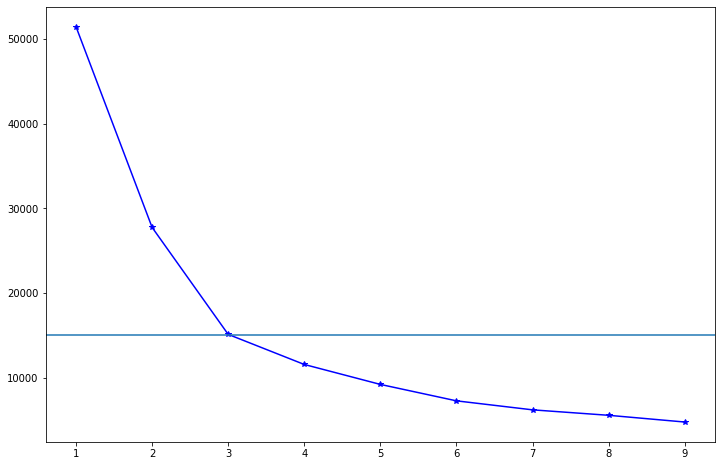

In [79]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1,10),ssd,marker='*',color='b')
plt.axhline(15000)
plt.show()

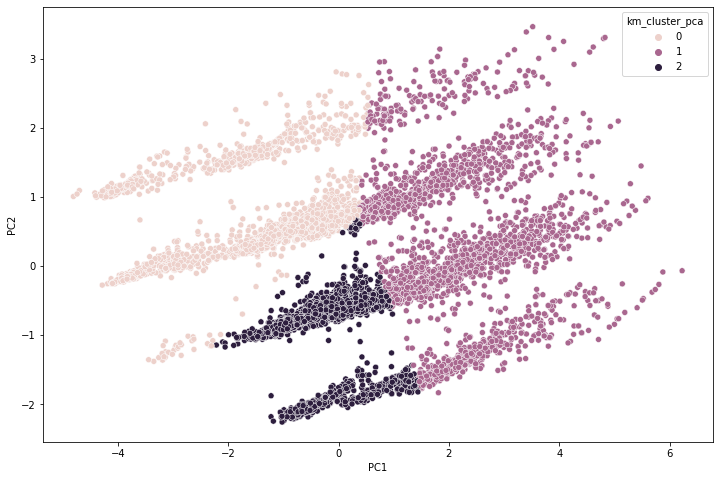

In [80]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

<a id="RS"></a>
#Recommendation Systems

## Content Based Filter

In [81]:
model=NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

NearestNeighbors(metric='cosine')

In [82]:
selected=7

In [83]:
data_encoded_scaled.iloc[selected].values[0:8]

array([-0.6494104492898559, -0.7723427482299117, -0.44096466513403765,
       -0.7156992001052467, -0.9313640361496651, 1, 0, 0], dtype=object)

In [84]:
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


array([[   7, 9387, 2171, 5186,  712, 1309]])

In [85]:
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([   7, 9387, 2171, 5186,  712, 1309])]

In [86]:
data_encoded_refernce = data_encoded_refernce.reset_index()
data_encoded_refernce = data_encoded_refernce.drop('index',axis=1)

##Test Case 2

In [87]:
# Land type user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Super built-up Area,location_7th Phase JP Nagar
7,1,2.0,1000.0,2.0,1.0,38.0,1,1


In [88]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Super built-up Area,location_7th Phase JP Nagar
7,1,2.0,1000.0,2.0,1.0,38.00,1,1
9387,1,2.0,1035.0,2.0,1.0,39.33,1,1
2171,1,2.0,1035.0,2.0,1.0,39.33,1,1
5186,1,2.0,1035.0,2.0,1.0,39.33,1,1
712,1,2.0,1040.0,2.0,1.0,39.52,1,1
1309,1,2.0,1035.0,2.0,1.0,41.39,1,1


## Test Case 2

In [90]:
# Land Type user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Super built-up Area,location_7th Phase JP Nagar
7,1,2.0,1000.0,2.0,1.0,38.0,1,1


In [91]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,availability,size,total_sqft,Hospitals,Public Connectivity,price,area_type_Super built-up Area,location_7th Phase JP Nagar
7,1,2.0,1000.0,2.0,1.0,38.00,1,1
9387,1,2.0,1035.0,2.0,1.0,39.33,1,1
2171,1,2.0,1035.0,2.0,1.0,39.33,1,1
5186,1,2.0,1035.0,2.0,1.0,39.33,1,1
712,1,2.0,1040.0,2.0,1.0,39.52,1,1
1309,1,2.0,1035.0,2.0,1.0,41.39,1,1
